<a href="https://colab.research.google.com/github/rpizarrog/simulacion/blob/main/python%20casos/Caso_13_Variables_aleatorias_continuas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Variables aleatorias continuas

Existen distintas distribuciones que permiten tratar con variables aleatoris continuas

- Distribución uniforme continua
- Distribución normal
- Distribución t student
- Distribucuón exponencial
- Distribución chi cuadrada
- Distribución f de Fisher
- Entre otras....

Generar 100 números aleatorios de cada disribución y visualizar su histograma y densidad.

Existenn deiversas alternaivas para generar números aleatorios de variables continuas en Python.

Este caso se ajsutará a utilizar la bilioteca *from scipy.stats* y la correspondiente distribución.




# Desarrollo



## Cargar librerias


In [45]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import uniform  # uniforme continua
from scipy.stats import norm # normal

from IPython.display import display, HTML # Para html tablas ...

## Crear funciones



In [14]:
def f_visualizar_histograma_continua (datos, k):
  # Crear un gráfico de distribución de la variable continua
  sns.histplot(data=datos, kde=True, bins = k)
  plt.xlabel(datos.columns[0])
  plt.ylabel('Frecuencia')
  plt.title('Distribución de Variable Continua')
  plt.show()

# Recibe una datos con una variabel continua y el número de cortes o clases
# que sirven para construir tabla basados en los k clases
def f_construye_tabla_distribucion_continua(datos, k):
  # Crear una tabla de frecuencia
  tabla_frecuencia = pd.cut(datos.iloc[:, 0], bins=k, include_lowest=True).value_counts().reset_index()
  tabla_frecuencia.columns = ['Clase', 'Frec']
  # tabla_frecuencia

  # Ordenar la tabla de frecuencia por el intervalo
  tabla_frecuencia = tabla_frecuencia.sort_values(by='Clase')
  tabla_frecuencia = tabla_frecuencia.reset_index(drop=True) # Regenera index

  # Generar columnas siguientes
  tabla_frecuencia['Frec Rel'] = tabla_frecuencia['Frec'] / n
  tabla_frecuencia['Frec Porc'] = tabla_frecuencia['Frec'] / n * 100
  tabla_frecuencia['Frec Ac'] = tabla_frecuencia['Frec'].cumsum()

  return tabla_frecuencia

## Sembrar la semilla


In [15]:
random.seed(2023) ## semilla año 2023

# Distribución uniforme

La entrega de Pizzas llega entre 15 y 45 minutos de manera uniforme.



In [54]:
# Generar 100 números aleatorios en una distribución uniforme entre 15 y 45 minutos
min = 15
max = 45 - min # o sea 30 a partir de 15 que d 45 el valor máximo
n = 100

# Crear una variable aleatoria uniforme continua
uniform_rv = uniform(loc = min, scale = max)  # los define el inicio 15 y scale la amplitud

# Generar números aleatorios a partir de la distribución
numeros_aleatorios = uniform_rv.rvs(size=n)


# Imprimir los números aleatorios
np.round(numeros_aleatorios, 4)

array([16.2908, 35.4711, 30.1018, 22.1341, 41.939 , 42.4529, 42.4701,
       34.6455, 18.6855, 32.6322, 25.6889, 22.3312, 27.3078, 15.7115,
       23.6152, 16.962 , 25.6544, 24.9055, 44.8736, 40.7711, 33.4408,
       21.1503, 25.8323, 31.8947, 37.1608, 30.1564, 22.7444, 28.1962,
       31.0617, 19.7968, 35.3104, 37.7607, 24.9425, 35.4344, 29.6936,
       22.1497, 25.9929, 37.3266, 30.6038, 23.7678, 38.5195, 36.23  ,
       38.6991, 29.4986, 34.6106, 18.2417, 37.3222, 26.1303, 19.5457,
       29.9429, 34.3974, 24.8086, 32.1604, 30.5734, 37.7528, 23.2994,
       41.0585, 25.8488, 31.1355, 42.4308, 15.1025, 18.2245, 35.1463,
       23.594 , 42.4076, 20.8994, 44.3913, 17.8205, 40.3268, 18.9125,
       15.8144, 30.4498, 29.9195, 33.9086, 18.5951, 26.0902, 16.9392,
       32.9177, 19.9479, 39.8034, 29.6738, 22.8825, 37.1159, 40.198 ,
       42.5887, 24.6085, 15.2059, 24.2849, 42.1892, 26.7917, 29.489 ,
       42.8049, 16.4072, 28.2744, 40.3964, 43.6259, 40.298 , 34.4983,
       26.2068, 22.8

## Visualizar histograma y su densidad


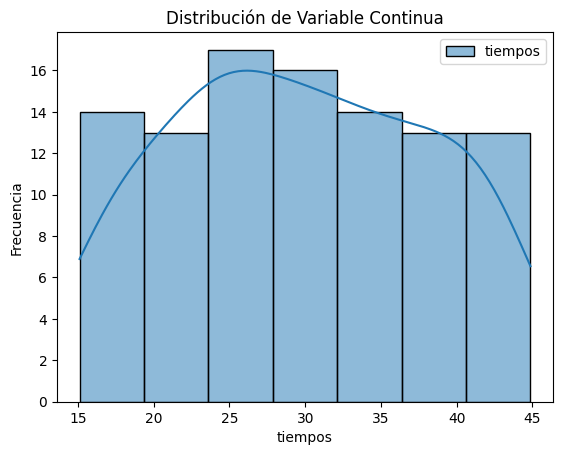

In [55]:
# Convergir los números aleatoios a un data.frame
datos = pd.DataFrame({"tiempos" :numeros_aleatorios})
k = 7 # Numero de cortes o divisiones o clases en el histograma

# Solo mandar llamar la función

f_visualizar_histograma_continua (datos, k)

## Probabilidad de uniforme continua

Se utiliza la función *pmf()* de la librería *scipy.stats*

¿Cúal es la probabilidad de que la Pizza llegue entre 20 y 30 minutos?.



In [44]:
a = 20
b = 30
# Calcular la probabilidad de que llegue entre 20 y 30 minutos
probabilidad = uniform.cdf(b, loc=min, scale=max) - uniform.cdf(a, loc=min, scale=max)
#probabilidad = probabilidad * 100
print(f"La probabilidad de que la pizza llegue entre 20 y 30 minutos es: {probabilidad:.2f} %")


La probabilidad de que la pizza llegue entre 20 y 30 minutos es: 0.33 %


## Distribución normal

La estatura promedio de los alumnos varones del ITD.

$$
\mu = 170
$$
$$
\sigma = 10
$$

In [59]:
media = 170
desv_std = 10
n = 100

# Genera 100 valores aleatorios de una distribución normal
numeros_aleatorios = norm.rvs(loc=media, scale=desv_std, size=n)

print(numeros_aleatorios)

[161.88591752 166.18262415 168.4567363  161.32031998 170.4734733
 181.46267967 172.85979936 157.24377872 175.35454282 181.89611739
 177.24020193 161.70662805 173.44323663 153.12477043 163.71296742
 156.8523539  165.2452197  164.66397975 170.42886393 181.62717272
 174.29730134 158.77977309 162.03192971 163.16275757 159.59004297
 174.50758893 172.08036817 167.66597663 171.2263073  162.80566398
 169.34271796 164.1959479  167.20103385 194.17203857 174.32825668
 158.16484141 172.60460154 179.38600273 182.81513455 169.82722544
 163.1065734  162.30006758 169.98094766 166.50064025 171.02098272
 170.05611563 184.66839294 161.50130603 180.45186892 175.38145174
 171.59510212 163.71212297 173.91901136 168.33941642 169.09187036
 180.83468965 189.37104901 167.77956983 166.61992706 159.75414913
 178.1735738  177.25085634 163.18202525 177.30011672 178.87594767
 166.53290544 175.68833492 174.94421095 170.07853893 168.19784132
 163.03939323 182.63818345 161.41702917 174.17640638 167.48491511
 155.968356

## Visualizar histograma y densidad de distribución normal



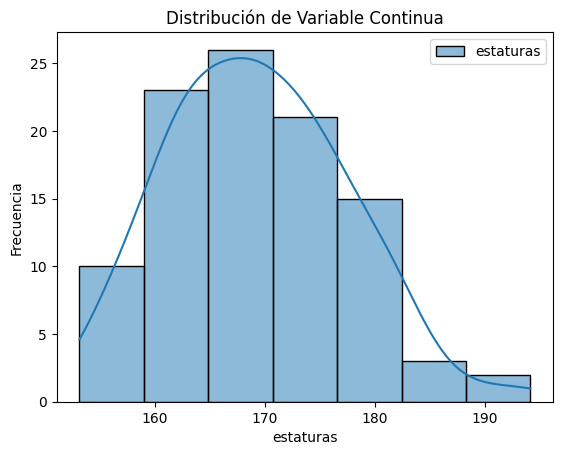

In [60]:
# Convergir los números aleatoios a un data.frame
datos = pd.DataFrame(numeros_aleatorios)
k = 7 # Numero de cortes o divisiones o clases


# Convergir los números aleatoios a un data.frame
datos = pd.DataFrame({"estaturas" :numeros_aleatorios})
# Solo mandar llamar la función

f_visualizar_histograma_continua (datos, k)